# [Loading and normalizing datasets](https://learn.microsoft.com/en-us/training/modules/intro-machine-learning-pytorch/3-data)

Pytorch에서 제공하는 Data 로드 모듈
- `torch.utils.data.Dataset`
- `torch.utils.data.DataLoader`

### 구글 드라이브 연결

In [1]:
# 구글 드라이브 연결(데이터 로드를 위해서)
from google.colab import drive

drive.mount('/content/data')
DATA_PATH = "/content/data/MyDrive/ai_lecture/2. Deep Learning/data/"

Mounted at /content/data


# Dataset and DataLoader

In [2]:
import numpy as np

import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

import matplotlib.pyplot as plt
%matplotlib inline

## 1.torch에서 제공하는 Dataset 사용

### [FashionMNIST](https://github.com/mpalaourg/FashionMNIST-PyTorch)

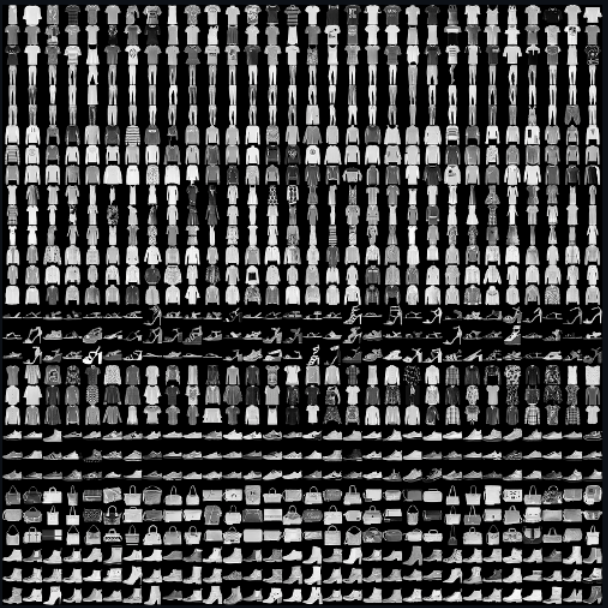

- 28 x 28 grayscale image
- 60,000 training examples / 10,000 test examples
- 10 Labels
    - T-shirt/top
    - Trouser
    - Pullover
    - Dress
    - Coat
    - Sandal
    - Shirt
    - Sneaker
    - Bag
    - Ankle boot

In [4]:
training_data = datasets.FashionMNIST(
    root="fashion_data", # path where the data is stored
    train=True, # specifies training or test dataset
    download=True, # downloads the from the Internet if it's not avaliable at root.
    # transform=ToTensor() # specify the feature and label transformations
)

test_data = datasets.FashionMNIST(
    root="fashion_data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:02<00:00, 12504397.35it/s]


Extracting fashion_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to fashion_data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 200981.71it/s]


Extracting fashion_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to fashion_data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3757305.16it/s]


Extracting fashion_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to fashion_data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 4810041.66it/s]

Extracting fashion_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to fashion_data/FashionMNIST/raw



- 데이터셋별 데이터 크기

In [5]:
len(training_data), len(test_data)

(60000, 10000)

- 데이터 확인

In [6]:
features, target = training_data[0]

- features: 28 x 28 크기의 이미지
- target: int형의 숫자

In [7]:
np.array(features).shape, target

((28, 28), 9)

### Iterating and Visualizing the Dataset

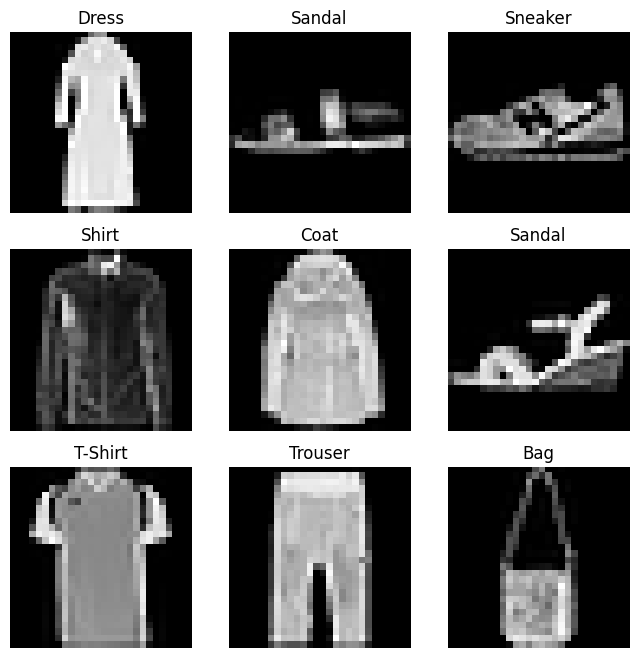

In [8]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img, cmap="gray")
plt.show()

### Preparing your data for training with DataLoaders

In [9]:
from torch.utils.data import DataLoader

test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

### Iterate through the DataLoader

In [10]:
# Display image and label.
test_features, test_labels = next(iter(test_dataloader))
print(f"Feature batch shape: {test_features.size()}")
print(f"Labels batch shape: {test_labels.size()}")

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


In [11]:
test_features[0].shape

torch.Size([1, 28, 28])

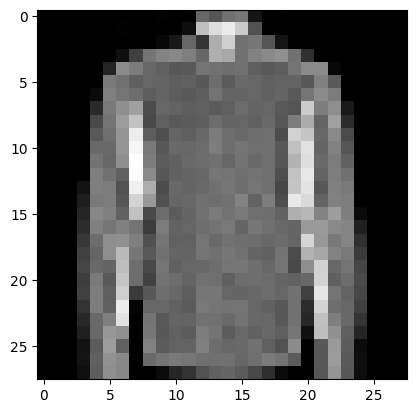

Label: 6


In [12]:
img = test_features[0].squeeze() # (28, 28)
label = test_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

## [2.ImageFolder를 이용하여 Dataset 생성](https://www.learnpytorch.io/04_pytorch_custom_datasets/)

### Get Data

In [13]:
import requests # 인터넷 통신용 모듈
import zipfile # 압축파일 모듈
from pathlib import Path # 파일 패스 모듈

data_path = Path(DATA_PATH)
image_path = data_path / "pizza_steak_sushi" # data/pizza_steak_sushi

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    # Setup path to data folder
    data_path = Path("data/")
    image_path = data_path / "pizza_steak_sushi" # data/pizza_steak_sushi
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

    # Download pizza, steak, sushi data
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...")
        zip_ref.extractall(image_path)

/content/data/MyDrive/ai_lecture/2. Deep Learning/data/pizza_steak_sushi directory exists.


In [14]:
image_path

PosixPath('/content/data/MyDrive/ai_lecture/2. Deep Learning/data/pizza_steak_sushi')

In [15]:
import os # os(윈도우, 리눅스 등)을 사용할 때 사용하는 모듈

def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str or pathlib.Path): target directory

  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


In [16]:
walk_through_dir(image_path)

There are 2 directories and 0 images in '/content/data/MyDrive/ai_lecture/2. Deep Learning/data/pizza_steak_sushi'.
There are 3 directories and 0 images in '/content/data/MyDrive/ai_lecture/2. Deep Learning/data/pizza_steak_sushi/test'.
There are 0 directories and 31 images in '/content/data/MyDrive/ai_lecture/2. Deep Learning/data/pizza_steak_sushi/test/sushi'.
There are 0 directories and 25 images in '/content/data/MyDrive/ai_lecture/2. Deep Learning/data/pizza_steak_sushi/test/pizza'.
There are 0 directories and 19 images in '/content/data/MyDrive/ai_lecture/2. Deep Learning/data/pizza_steak_sushi/test/steak'.
There are 3 directories and 0 images in '/content/data/MyDrive/ai_lecture/2. Deep Learning/data/pizza_steak_sushi/train'.
There are 0 directories and 75 images in '/content/data/MyDrive/ai_lecture/2. Deep Learning/data/pizza_steak_sushi/train/steak'.
There are 0 directories and 74 images in '/content/data/MyDrive/ai_lecture/2. Deep Learning/data/pizza_steak_sushi/train/pizza'.

In [17]:
# Setup train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('/content/data/MyDrive/ai_lecture/2. Deep Learning/data/pizza_steak_sushi/train'),
 PosixPath('/content/data/MyDrive/ai_lecture/2. Deep Learning/data/pizza_steak_sushi/test'))

### Visualize an image

- PIL을 이용

Random image path: /content/data/MyDrive/ai_lecture/2. Deep Learning/data/pizza_steak_sushi/test/steak/2144308.jpg
Image class: steak
Image height: 512
Image width: 289


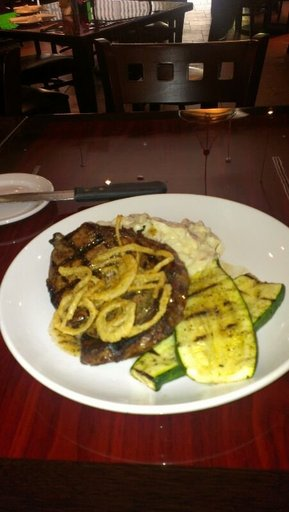

In [18]:
import random
from PIL import Image

# Set seed
random.seed(42) # <- try changing this and see what happens

# 1. Get all image paths (* means "any combination")
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Get random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

- matplotlib 이용

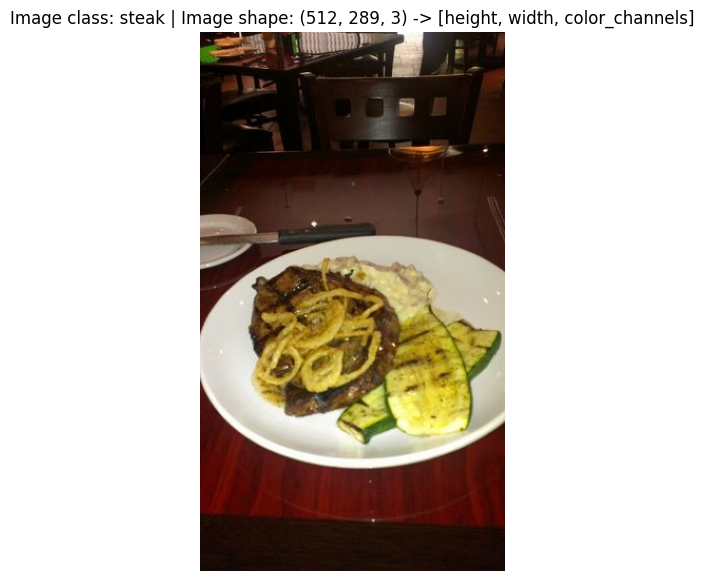

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False);

### ImageFolder

In [20]:
# Use ImageFolder to create dataset(s)
from torchvision import datasets

train_data = datasets.ImageFolder(root=train_dir, # target folder of images
                                  transform=ToTensor(), # Features 정규화
                                  target_transform=None) # transforms to perform on labels (if necessary)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=ToTensor()) # Features 정규화 )

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 221
    Root location: /content/data/MyDrive/ai_lecture/2. Deep Learning/data/pizza_steak_sushi/train
    StandardTransform
Transform: ToTensor()
Test data:
Dataset ImageFolder
    Number of datapoints: 75
    Root location: /content/data/MyDrive/ai_lecture/2. Deep Learning/data/pizza_steak_sushi/test
    StandardTransform
Transform: ToTensor()


In [21]:
# Get class names as a list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [22]:
# Can also get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [23]:
# Check the lengths
len(train_data), len(test_data)

(221, 75)

Original shape: torch.Size([3, 512, 512]) -> [color_channels, height, width]
Image permute shape: torch.Size([512, 512, 3]) -> [height, width, color_channels]


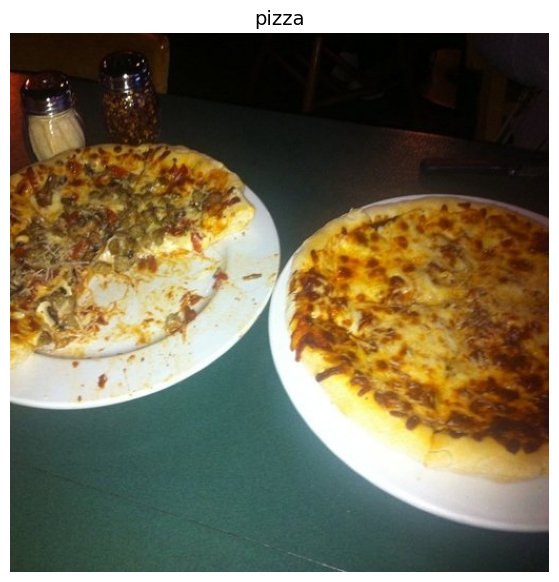

In [24]:
# img, label = train_data[0][0], train_data[0][1]
img, label = train_data[0] # img: 컬러, 높이, 너비

# Rearrange the order of dimensions
img_permute = img.permute(1, 2, 0) # 높이, 너비, 컬러

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")
plt.title(class_names[label], fontsize=14);

### DataLoader

In [25]:
# Turn train and test Datasets into DataLoaders
from torch.utils.data import DataLoader

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=1, # how many samples per batch?]
                              shuffle=True) # shuffle the data?

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=1,
                             shuffle=False) # don't usually need to shuffle testing data

len(train_dataloader), len(test_dataloader)

(221, 75)

In [26]:
img, label = next(iter(train_dataloader))

# Batch size will now be 1, try changing the batch_size parameter above and see what happens
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([1, 3, 512, 512]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


## 3.Dataset 클래스 생성

### Creating a helper function to get class names
To do so, we'll:
1. Get the class names using `os.scandir()` to traverse a target directory
2. Raise an error if the class names aren't found.
3. Turn the class names into a dictionary of numerical labels, one for each class.

In [27]:
# Setup path for target directory
target_directory = train_dir
print(f"Target directory: {target_directory}")

# Get the class names from the target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(image_path / "train"))])
print(f"Class names found: {class_names_found}")

Target directory: /content/data/MyDrive/ai_lecture/2. Deep Learning/data/pizza_steak_sushi/train
Class names found: ['pizza', 'steak', 'sushi']


In [28]:
from typing import Tuple, Dict, List

# Make function to find classes in target directory
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
    """Finds the class folder names in a target directory.

    Assumes target directory is in standard image classification format.

    Args:
        directory (str): target directory to load classnames from.

    Returns:
        Tuple[List[str], Dict[str, int]]: (list_of_class_names, dict(class_name: idx...))

    Example:
        find_classes("food_images/train")
        >>> (["class_1", "class_2"], {"class_1": 0, ...})
    """
    # 1. Get the class names by scanning the target directory
    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

    # 2. Raise an error if class names not found
    if not classes:
        raise FileNotFoundError(f"Couldn't find any classes in {directory}.")

    # 3. Crearte a dictionary of index labels (computers prefer numerical rather than string labels)
    class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
    return classes, class_to_idx

In [29]:
find_classes(train_dir)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### Creating a Dataset

In [30]:
import pathlib

# Write a custom dataset class (inherits from torch.utils.data.Dataset)
from torch.utils.data import Dataset

# 1. Subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):

    # 2. Initialize with a targ_dir and transform (optional) parameter
    def __init__(self, targ_dir: str, transform=None) -> None:

        # 3. Create class attributes
        # Get all image paths
        self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg")) # note: you'd have to update this if you've got .png's or .jpeg's
        # Setup transforms
        self.transform = transform
        # Create classes and class_to_idx attributes
        self.classes, self.class_to_idx = find_classes(targ_dir)

    # 4. Make function to load images
    def load_image(self, index: int) -> Image.Image:
        "Opens an image via a path and returns it."
        image_path = self.paths[index]
        return Image.open(image_path)

    # 5. Overwrite the __len__() method (optional but recommended for subclasses of torch.utils.data.Dataset)
    def __len__(self) -> int:
        "Returns the total number of samples."
        return len(self.paths)

    # 6. Overwrite the __getitem__() method (required for subclasses of torch.utils.data.Dataset)
    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
        "Returns one sample of data, data and label (X, y)."
        img = self.load_image(index)
        class_name  = self.paths[index].parent.name # expects path in data_folder/class_name/image.jpeg
        class_idx = self.class_to_idx[class_name]

        # Transform if necessary
        if self.transform:
            return self.transform(img), class_idx # return data, label (X, y)
        else:
            return img, class_idx # return data, label (X, y)

In [31]:
train_data_custom = ImageFolderCustom(targ_dir=train_dir,
                                      transform=ToTensor() # Features 정규화
                                      )
test_data_custom = ImageFolderCustom(targ_dir=test_dir,
                                     transform=ToTensor() # Features 정규화
                                     )

train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x7d75bcef6590>,
 <__main__.ImageFolderCustom at 0x7d75bcef65f0>)

In [32]:
# Get class names as a list
class_names = train_data_custom.classes
class_names

['pizza', 'steak', 'sushi']

In [33]:
# Check the lengths
len(train_data), len(test_data)

(221, 75)

Original shape: torch.Size([3, 512, 512]) -> [color_channels, height, width]
Image permute shape: torch.Size([512, 512, 3]) -> [height, width, color_channels]


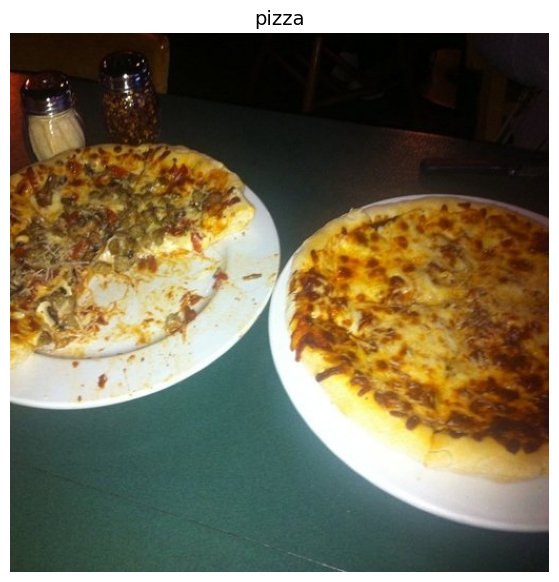

In [34]:
# img, label = train_data[0][0], train_data[0][1]
img, label = train_data[0] # img: 컬러, 높이, 너비

# Rearrange the order of dimensions
img_permute = img.permute(1, 2, 0) # 높이, 너비, 컬러

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")
plt.title(class_names[label], fontsize=14);

### DataLoader

In [35]:
# Turn train and test Datasets into DataLoaders
from torch.utils.data import DataLoader

train_custom_dataloader = DataLoader(dataset=train_data_custom,
                              batch_size=1, # how many samples per batch?]
                              shuffle=True) # shuffle the data?

test_custom_dataloader = DataLoader(dataset=test_data_custom,
                             batch_size=1,
                             shuffle=False) # don't usually need to shuffle testing data

len(train_custom_dataloader), len(test_custom_dataloader)

(221, 75)

In [36]:
img, label = next(iter(train_custom_dataloader))

# Batch size will now be 1, try changing the batch_size parameter above and see what happens
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([1, 3, 512, 512]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


# Transforming Data For Image
> Often, the data you get won't be 100% ready to use with a machine learning model, here we'll look at some steps we can take to transform our images so they're ready to be used with a model.

## Transforms

To get experience with `torchvision.transforms`, let's write a series of transform steps that:
1. Resize the images using `transforms.Resize()`
2. Flip our images randomly on the hirizontal using `transforms.RandomHorizontalFlip()`  
> this could be considered a form of data augmentation because it will artificially change our image data
3. Turn our images from a PIL image to a Pytorch tensor using `transforms.ToTensor()`.

We can compile all of these steps using `torchvision.transforms.Compose()`.

In [37]:
from torchvision import datasets, transforms

In [38]:
# Augment train data
train_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

# Don't augment test data, only reshape
test_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

In [39]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    """Plots a series of random images from image_paths.

    Will open n image paths from image_paths, transform them
    with transform and plot them side by side.

    Args:
        image_paths (list): List of target image paths.
        transform (PyTorch Transforms): Transforms to apply to images.
        n (int, optional): Number of images to plot. Defaults to 3.
        seed (int, optional): Random seed for the random generator. Defaults to 42.
    """
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)


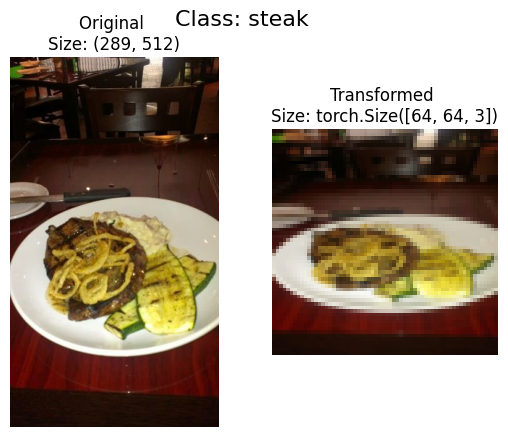

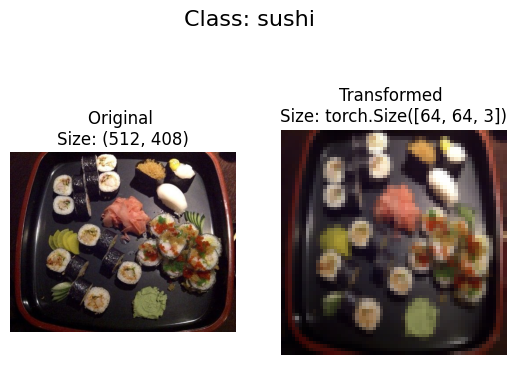

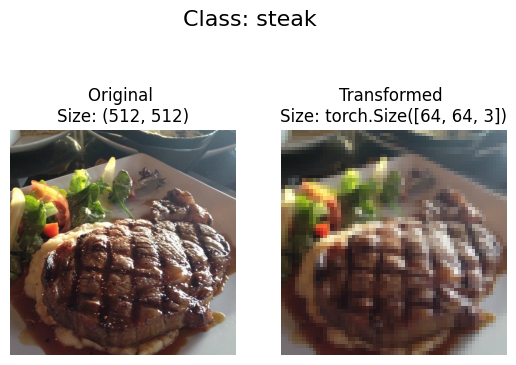

In [40]:
plot_transformed_images(image_path_list,
                        transform=train_transforms,
                        n=3)

## With ImageFolder

In [41]:
# Use ImageFolder to create dataset(s)
from torchvision import datasets

train_data = datasets.ImageFolder(root=train_dir, # target folder of images
                                  transform=train_transforms, # transforms to perform on data (images)
                                  target_transform=None) # transforms to perform on labels (if necessary)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=test_transforms)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 221
    Root location: /content/data/MyDrive/ai_lecture/2. Deep Learning/data/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 75
    Root location: /content/data/MyDrive/ai_lecture/2. Deep Learning/data/pizza_steak_sushi/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )


In [42]:
# Get class names as a list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

Original shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Image permute shape: torch.Size([64, 64, 3]) -> [height, width, color_channels]


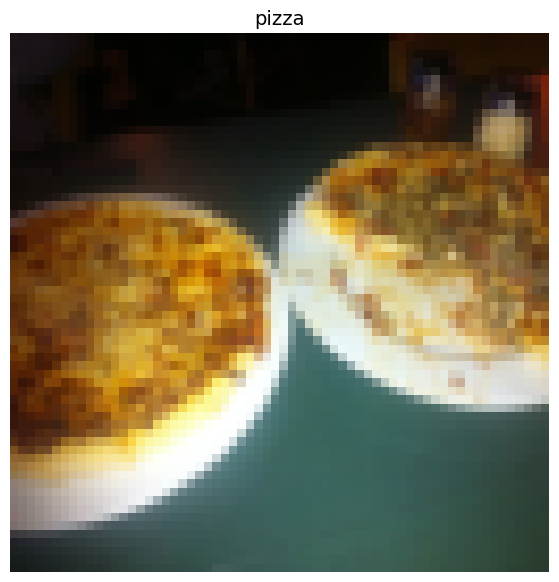

In [43]:
# img, label = train_data[0][0], train_data[0][1]
img, label = train_data[0] # img: 컬러, 높이, 너비

# Rearrange the order of dimensions
img_permute = img.permute(1, 2, 0) # 높이, 너비, 컬러

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")
plt.title(class_names[label], fontsize=14);

## With Custom Dataset

In [44]:
train_data_custom = ImageFolderCustom(targ_dir=train_dir,
                                      transform=train_transforms)
test_data_custom = ImageFolderCustom(targ_dir=test_dir,
                                     transform=test_transforms)
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x7d75bcb62590>,
 <__main__.ImageFolderCustom at 0x7d75bccf5870>)

In [45]:
len(train_data_custom), len(test_data_custom)

(221, 75)

In [46]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

Original shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Image permute shape: torch.Size([64, 64, 3]) -> [height, width, color_channels]


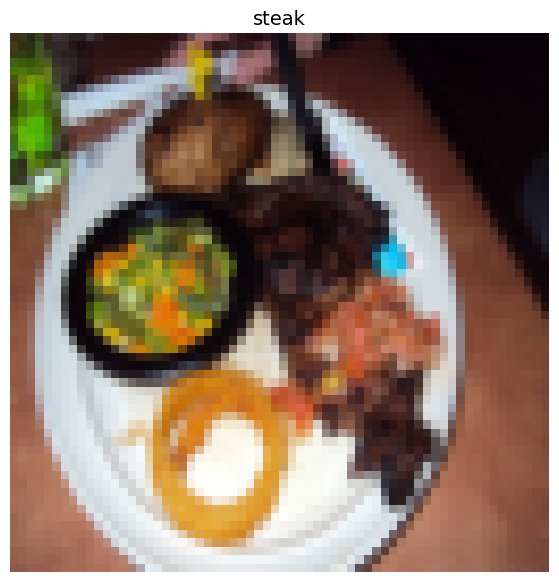

In [47]:
# img, label = train_data[0][0], train_data[0][1]
img, label = train_data_custom[0] # img: 컬러, 높이, 너비

# Rearrange the order of dimensions
img_permute = img.permute(1, 2, 0) # 높이, 너비, 컬러

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")
plt.title(class_names[label], fontsize=14);

# Normalization(정규화)

- 값의 범위(scale)을 0-1 사이로 변경
- 학습 전에 scaling하는 이유
    - 머신러닝에서 scale이 큰 feature의 영향이 비대해지는 것을 방지
    - 딥러닝에서 Loacal Minima에 빠질 위험 감소(학습 속도 향상)

## 비정규화

In [49]:
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds1 = datasets.FashionMNIST(
    root="fashion_data",
    train=True,
    download=True
)

In [50]:
len(ds1)

60000

In [51]:
ds1[10]

(<PIL.Image.Image image mode=L size=28x28>, 0)

In [52]:
ds_features, ds_label = ds1[1] # (features, target)

In [64]:
np.array(ds_features).shape

(28, 28)

In [54]:
np.array(ds_features).max(), np.array(ds_features).min()

(255, 0)

In [55]:
ds_label

0

## 정규화

In [56]:
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds2 = datasets.FashionMNIST(
    root="dafashion_datata",
    train=True,
    download=True,
    transform=ToTensor(), # Features 정규화
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1)) # target 정규화
)

100%|██████████| 26421880/26421880 [00:05<00:00, 4426064.17it/s]


Extracting dafashion_datata/FashionMNIST/raw/train-images-idx3-ubyte.gz to dafashion_datata/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 199012.74it/s]


Extracting dafashion_datata/FashionMNIST/raw/train-labels-idx1-ubyte.gz to dafashion_datata/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3701720.35it/s]


Extracting dafashion_datata/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to dafashion_datata/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 3954629.49it/s]

Extracting dafashion_datata/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to dafashion_datata/FashionMNIST/raw



In [57]:
ds_feautres, ds_label = ds2[1]

In [58]:
np.array(ds_feautres).max(), np.array(ds_feautres).min()

(1.0, 0.0)

In [62]:
ds_feautres.shape

torch.Size([1, 28, 28])

In [60]:
ds_label # 0 -> T-Shirt

tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [61]:
len(ds_label), ds_label.shape

(10, torch.Size([10]))